## Загрузка библиотек

In [1]:
import pandas as pd

## Загрузка данных

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [2]:
def read_covid_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv)
    return df, None


def read_hr_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv)
    return df, df['target']

In [5]:
COVID_DATA_PATH = './hw_EDA_data/covid.csv'

HR_DATA_PATH = './hw_EDA_data/hr.csv'


In [6]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

## EDA

### Задание

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

In [7]:
categorial_features = X_hr.select_dtypes(object)
numeric_features = X_hr.select_dtypes('number')

print(categorial_features.nunique())
numeric_features.describe()

city                   123
gender                   3
relevent_experience      2
enrolled_university      3
education_level          5
major_discipline         6
experience              22
company_size             8
company_type             6
last_new_job             6
dtype: int64


,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


#### 2.
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [9]:
print(f'Исходный размер датасета hr {len(X_hr.index)}')

Исходный размер датасета hr 19158


In [10]:
X_hr_dropna = X_hr.dropna()

In [11]:
print(f'Pазмер датасета hr без NaN {len(X_hr_dropna.index)}')

categorial_features = X_hr_dropna.select_dtypes(object)
numeric_features = X_hr_dropna.select_dtypes('number')

print(categorial_features.nunique())
numeric_features.describe()

dataset_length = len(X_hr.index)

Pазмер датасета hr без NaN 8955
city                   116
gender                   3
relevent_experience      2
enrolled_university      3
education_level          3
major_discipline         6
experience              22
company_size             8
company_type             6
last_new_job             6
dtype: int64


_Ваш ответ_

Давайте попробуем избежать сокращения размера датасета.

#### 3.
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

#### 4.
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

_Ваш ответ_

In [12]:
def fill_na(X, y):
    X_fill = X_hr
#3. There're no NaN for numeric values
#4.
    #nan for gender has meaning
    X_fill['gender'] = X_hr['gender'].fillna('Non-binary')

    # enrolled_university, education_level, experience, last_new_job nan has no meaning & small percentage
    X_fill = X_hr.dropna(subset = ['enrolled_university','education_level','experience','last_new_job'])

    # nan for major_discipline means that person has no graduate or higher degree
    X_fill['major_discipline'] = X_hr['major_discipline'].fillna('No degree')

    # company_size, company_type nan has no meaning & big %
    size_filler = X_hr.company_size.mode(dropna = True)[0]
    type_filler = X_hr.company_type.mode(dropna = True)[0]
    X_fill['company_size'] = X_hr['company_size'].fillna(size_filler)
    X_fill['company_type'] = X_hr['company_type'].fillna(type_filler)

    y_fill = X_fill['target']
    return X_fill, y_fill

In [13]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)
X_hr_fill

<ipython-input-12-1bc25c5643dc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_fill['major_discipline'] = X_hr['major_discipline'].fillna('No degree')
<ipython-input-12-1bc25c5643dc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_fill['company_size'] = X_hr['company_size'].fillna(size_filler)
<ipython-input-12-1bc25c5643dc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Non-binary,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,Non-binary,Has relevent experience,Part time course,Graduate,STEM,11,50-99,Pvt Ltd,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,No degree,<1,500-999,Pvt Ltd,2,97,0.0


#### 5. 
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

In [14]:
categorial_features = X_hr_fill.select_dtypes(object)
numeric_features = X_hr_fill.select_dtypes('number')

print(categorial_features.nunique())
numeric_features.describe()

city                   123
gender                   4
relevent_experience      2
enrolled_university      3
education_level          5
major_discipline         7
experience              22
company_size             8
company_type             6
last_new_job             6
dtype: int64


,enrollee_id,city_development_index,training_hours,target
count,18014.000000,18014.000000,18014.000000,18014.000000
mean,16903.699734,0.831728,65.347896,0.245420
std,9665.557267,0.122115,60.059220,0.430348
min,1.000000,0.448000,1.000000,0.000000
25%,8528.750000,0.745000,23.000000,0.000000
50%,17012.500000,0.910000,47.000000,0.000000
75%,25326.250000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


_Ваш ответ_

### Задание

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

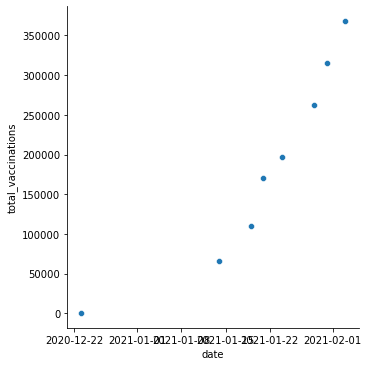

In [16]:
import seaborn as sns
#1.
X_covid_filtered = pd.DataFrame(X_covid.groupby('country').nunique())
#This works, but i don't understand why
country = X_covid_filtered.loc[X_covid_filtered['date'] == 43].iloc[0]
#2.
X_covid['date'] = pd.to_datetime(X_covid['date'], format = '%Y-%m-%d')
X_covid_country = X_covid.loc[X_covid['country'] == country.name]
#Is there a fast way to correct x axis?
plot = sns.relplot(x = X_covid_country['date'], y = X_covid_country['total_vaccinations'])

#3. Т.к. даты и _daily_vaccinations_ указаны во всех строках, кроме первой, мы примерно посчитать
# число вакцинированных людей за каждый промежуток времени.
X_covid_contry_sorted = X_covid_country.sort_values(by = ['date']).dropna(subset = ['daily_vaccinations'])
prev_date = X_covid_contry_sorted['date'].iloc[0]
prev_count = X_covid_contry_sorted['total_vaccinations'].iloc[0]
for ind in X_covid_contry_sorted.index:
    if(pd.isnull(X_covid['total_vaccinations'].iloc[ind])):
        X_covid.at[ind, 'total_vaccinations'] = prev_count + (X_covid['date'][ind] - prev_date).days * X_covid['daily_vaccinations'][ind]
    prev_date = X_covid['date'][ind]
    prev_count = X_covid['total_vaccinations'][ind]


_Ваш ответ_

### Задание 
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


<AxesSubplot:xlabel='training_hours'>

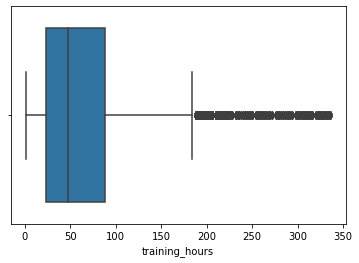

In [17]:
import matplotlib.pyplot as plt
# there's only 1 column that can have outliers(numeric and not index/id)
sns.boxplot(data=X_hr_fill, x='training_hours')

_Ваш ответ_

### Задание 
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


In [19]:
import category_encoders as ce
def encode(X):
#     X_encode = X
    #т.к. эти данные имеют порядок

    encoder= ce.OrdinalEncoder(cols=['relevent_experience', 'education_level', 'company_size'],
                               return_df = True,
                               mapping=[{'col':'relevent_experience','mapping':
                                         {'Has relevent experience':1,'No relevent experience':0}},
                                        {'col':'education_level','mapping':
                                         {'Primary School':0,'High School':1, 'Graduate':2, 'Masters':3, 'Phd':4}},
                                        {'col':'company_size','mapping':
                                         {'<10':0,'10/49':1, '50-99':2, '100-500':3, '500-999':4, '1000-4999':5, '5000-9999':6, '10000+':7}}
                                       ])
    X_encode = encoder.fit_transform(X)

    #тут аналогично есть порядок, но все лейблы заменять не нужно
    X_encode['experience'] = X_encode['experience'].replace({'>20': 21})
    X_encode['experience'] = X_encode['experience'].replace({'<1': 0})
    X_encode['last_new_job'] = X_encode['last_new_job'].replace({'never': 0})
    X_encode['last_new_job'] = X_encode['last_new_job'].replace({'>4': 5})

    #Нет порядка, не знаем влияет ли частота появления признаков на таргет.
    encoder = ce.OneHotEncoder(cols=['city', 'gender', 'enrolled_university', 'major_discipline', 'company_type'],return_df = True, use_cat_names = True)
    X_encode = encoder.fit_transform(X_encode)

    X_encode = X_encode.apply(pd.to_numeric)
    return X_encode

In [20]:
X_hr_encode = encode(X_hr_fill)
X_hr_encode

,enrollee_id,city_city_103,city_city_40,city_city_21,city_city_162,city_city_176,city_city_160,city_city_46,city_city_61,city_city_114,...,company_size,company_type_Pvt Ltd,company_type_Funded Startup,company_type_Early Stage Startup,company_type_Other,company_type_Public Sector,company_type_NGO,last_new_job,training_hours,target
0,8949,1,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,1,36,1.0
1,29725,0,1,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,5,47,0.0
2,11561,0,0,1,0,0,0,0,0,0,...,2,1,0,0,0,0,0,0,83,0.0
4,666,0,0,0,1,0,0,0,0,0,...,2,0,1,0,0,0,0,4,8,0.0
5,21651,0,0,0,0,1,0,0,0,0,...,2,1,0,0,0,0,0,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,1,42,1.0
19154,31398,1,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,4,52,1.0
19155,24576,1,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,4,44,0.0
19156,5756,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,97,0.0


_Ваш ответ_

### Задание 
Выполните задание для датасета _hr_.




#### 1. 
Реализуйте функцию undersampling

#### 2. 
Реализуйте функцию oversampling

In [33]:
X_hr_encode


,enrollee_id,city_city_103,city_city_40,city_city_21,city_city_162,city_city_176,city_city_160,city_city_46,city_city_61,city_city_114,...,company_size,company_type_Pvt Ltd,company_type_Funded Startup,company_type_Early Stage Startup,company_type_Other,company_type_Public Sector,company_type_NGO,last_new_job,training_hours,target
0,8949,1,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,1,36,1.0
1,29725,0,1,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,5,47,0.0
2,11561,0,0,1,0,0,0,0,0,0,...,2,1,0,0,0,0,0,0,83,0.0
4,666,0,0,0,1,0,0,0,0,0,...,2,0,1,0,0,0,0,4,8,0.0
5,21651,0,0,0,0,1,0,0,0,0,...,2,1,0,0,0,0,0,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,1,42,1.0
19154,31398,1,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,4,52,1.0
19155,24576,1,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,4,44,0.0
19156,5756,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,97,0.0


In [86]:
def undersampling(X, y):
    l1= len(y[y==1])
    l0 = len(y[y==0])

    if l0 < l1 :
        X_1 = X[X['target'] == 1].drop(index=X[X['target'] == 1][:l1 - l0], axis=0, inplace=True)
        X_under = pd.concat([ X[X['target'] == 0], X_1])
    else:
        X_0 = X[X['target'] == 0].drop(index=X[X['target'] == 0].index[:l0 - l1])
        X_under = pd.concat([X_0,  X[X['target'] == 1]])
    return X_under, X_under['target']

def oversampling(X, y):
    l1= len(y[y==1])
    l0 = len(y[y==0])
    if l0 < l1 :
       X_0 = pd.concat([X[X['target'] == 0]]*(l1 // l0))
       X_over = pd.concat([X_0, X[X['target'] == 1]])
    else:
        X_1 = pd.concat([X[X['target'] == 1]]*(l0 // l1))
        X_over = pd.concat([X_1, X[X['target'] == 0]])
    return X_over, X_over['target']

In [87]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)
print(len(X_hr_under['target'] == 0))
print(len(X_hr_under['target'] == 1))

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)
print(len(X_hr_under['target'] == 0))
print(len(X_hr_under['target'] == 1))

8842
8842
8842
8842


#### 3. 
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [88]:
!pip install -U imbalanced-learn

In [90]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X_hr_encode, y_hr_fill)

#### 4.
Как изменились распределения признаков при различных тактиках балансирования датасета?

In [100]:
print("Init")
print(X_hr_encode.describe())
print("Smote")
print(X_hr_SMOTE.describe())
print("Oversampling")
print(X_hr_over.describe())
print("Undersampling")
print(X_hr_under.describe())

Init
        enrollee_id  city_city_103  city_city_40  city_city_21  city_city_162  \
count  18014.000000   18014.000000  18014.000000  18014.000000   18014.000000   
mean   16903.699734       0.232819      0.003497      0.136227       0.006384   
std     9665.557267       0.422640      0.059036      0.343039       0.079646   
min        1.000000       0.000000      0.000000      0.000000       0.000000   
25%     8528.750000       0.000000      0.000000      0.000000       0.000000   
50%    17012.500000       0.000000      0.000000      0.000000       0.000000   
75%    25326.250000       0.000000      0.000000      0.000000       0.000000   
max    33380.000000       1.000000      1.000000      1.000000       1.000000   

       city_city_176  city_city_160  city_city_46  city_city_61  \
count   18014.000000   18014.000000  18014.000000  18014.000000   
mean        0.001110       0.045354      0.006773      0.010603   
std         0.033303       0.208084      0.082018      0.102426 

_Ваш ответ_